### Exploring data info using the session object

Demonstration of which information can be retrieved and explored with the session object

In [1]:
import sys
sys.path.insert(1, "/home/vinicius/storage1/projects/GrayData-Analysis")

In [2]:
from GDa.session import session

In [3]:
ses = session(
    raw_path="/home/vinicius/funcog/gda/GrayLab/",
    monkey="lucy",
    date="141014",
    session=1,
    slvr_msmod=False,
    align_to="cue",
    evt_dt=[-0.65, 3.00],
)

In [4]:
print(
    "------------------------------------------------------------------------------------------------------------------"
)
print("Recording info keys")
print(
    "------------------------------------------------------------------------------------------------------------------"
)
print(ses.recording_info.keys())

------------------------------------------------------------------------------------------------------------------
Recording info keys
------------------------------------------------------------------------------------------------------------------
dict_keys(['image_locations', 'image_names', 'image_data', 'channel_count', 'channel_numbers', 'area', 'depth', 'lfp_sampling_rate', 'calib_eye_sampling_rate', 'number_sua', 'ms_mod', 'slvr'])


In [5]:
print("Trial info keys")
print(
    "------------------------------------------------------------------------------------------------------------------"
)
ses.trial_info.head()

Trial info keys
------------------------------------------------------------------------------------------------------------------


,trial_index,behavioral_response,match_image,match_location,match_on,nonmatch_image,nonmatch_location,num_trials,reaction_time,sample_image,sample_location,sample_off,sample_on,trial_type
0,0,1.0,3.0,7.0,2806.0,5.0,3.0,742.0,134.0,3.0,1.0,1567.0,1047.0,1.0
1,1,1.0,3.0,2.0,2808.0,1.0,6.0,742.0,146.0,3.0,1.0,1569.0,1049.0,1.0
2,2,0.0,5.0,9.0,2716.0,3.0,5.0,742.0,235.0,5.0,1.0,1557.0,1037.0,1.0
3,3,0.0,4.0,3.0,2690.0,3.0,7.0,742.0,148.0,4.0,1.0,1557.0,1038.0,1.0
4,4,NaN,NaN,NaN,2668.0,NaN,NaN,742.0,NaN,NaN,NaN,1562.0,1042.0,2.0


In [6]:
import matplotlib.pyplot as plt
import numpy as np

Let's start by exploring some information concerning the trials in 'trial_info' starting by the 'sample_on', and 'sample_off' times.


Text(0.5, 0, 'Sample on')

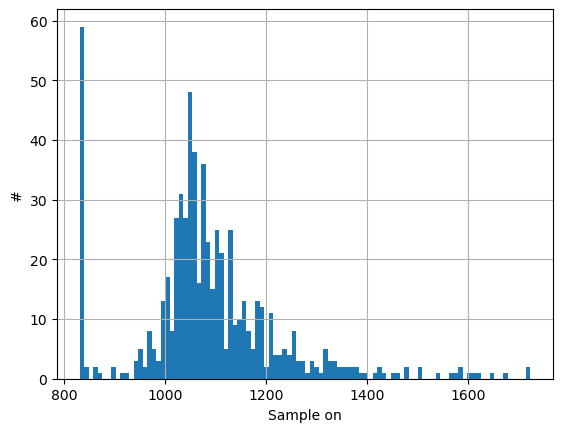

In [7]:
ses.trial_info["sample_on"].hist(bins=100)
plt.ylabel("#")
plt.xlabel("Sample on")

Text(0.5, 0, 'Sample off')

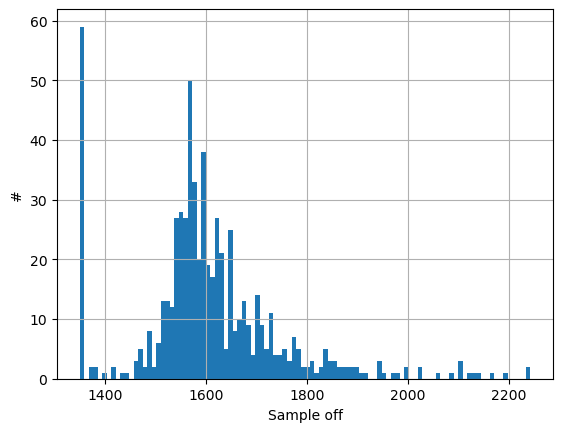

In [8]:
ses.trial_info["sample_off"].hist(bins=100)
plt.ylabel("#")
plt.xlabel("Sample off")

As one can see the interval of presentation of the cue varies from trial to trial within a session's date, this can be seen further by plotting the histogram of the time differences:

Text(0.5, 0, 'Sample off - Sample on')

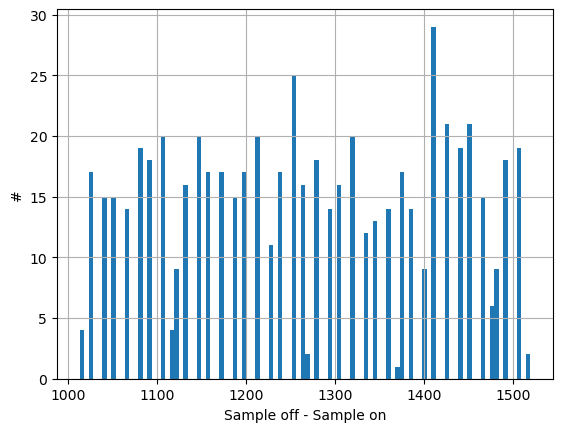

In [9]:
(ses.trial_info["match_on"] - ses.trial_info["sample_off"]).hist(bins=100)
plt.ylabel("#")
plt.xlabel("Sample off - Sample on")

If you plot the 'match_on', and 'match_off' you will notice that the same is truth.

Next, let's look at the recording informations. First let's plot the distribution of channels across areas in the cortex:

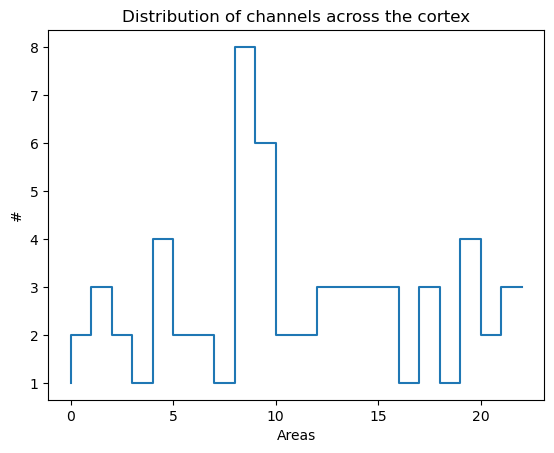

In [10]:
c, x = np.histogram(
    ses.recording_info["area"], bins=np.unique(ses.recording_info["area"])
)
plt.step(range(len(c)), c)
# plt.xticks(range(len(c)), x, rotation = 90)
plt.ylabel("#")
plt.xlabel("Areas")
plt.title("Distribution of channels across the cortex")
plt.show()

Next, the depth of channels:

Text(0.5, 0, 'Depth (mm)')

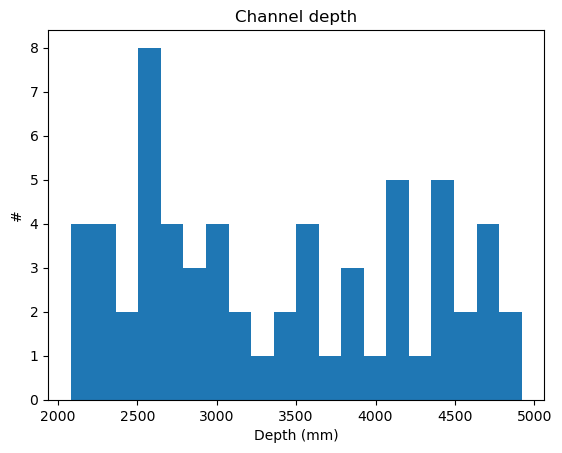

In [11]:
plt.hist(ses.recording_info["depth"], 20)
plt.title("Channel depth")
plt.ylabel("#")
plt.xlabel("Depth (mm)")

And finally, the  image data

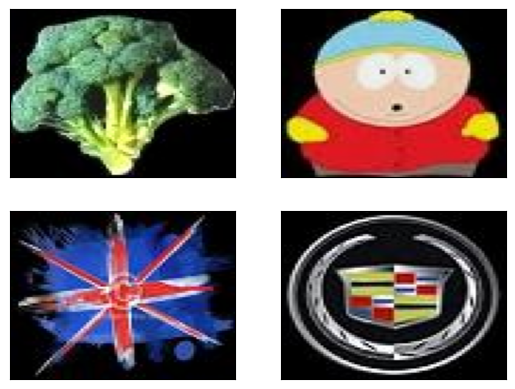

In [12]:
plt.subplot(2, 2, 1)
plt.imshow(ses.recording_info["image_data"][0], aspect="auto", cmap="jet")
plt.xticks([])
plt.yticks([])
plt.subplot(2, 2, 2)
plt.imshow(ses.recording_info["image_data"][1], aspect="auto", cmap="jet")
plt.xticks([])
plt.yticks([])
plt.subplot(2, 2, 3)
plt.imshow(ses.recording_info["image_data"][2], aspect="auto", cmap="jet")
plt.xticks([])
plt.yticks([])
plt.subplot(2, 2, 4)
plt.imshow(ses.recording_info["image_data"][3], aspect="auto", cmap="jet")
plt.xticks([])
plt.yticks([])
plt.savefig("stimulus.pdf", dpi=600)

The other informations can be easily explored the same way.

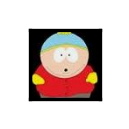

In [23]:
plt.figure(figsize=(.3,.3), dpi=300)
plt.imshow(ses.recording_info["image_data"][1], aspect="auto", cmap="jet")
plt.xticks([])
plt.yticks([])
plt.savefig("cartman.png", bbox_inches='tight')

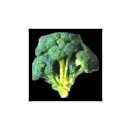

In [24]:
plt.figure(figsize=(.3,.3), dpi=300)
plt.imshow(ses.recording_info["image_data"][0], aspect="auto", cmap="jet")
plt.xticks([])
plt.yticks([])
plt.savefig("brocoli.png", bbox_inches='tight')